In [ ]:
# 1. Struktureret Datasæt (Tabeller/CSV)
# Datasæt: Global Superstore Sales Dataset (CSV)
# https://www.kaggle.com/datasets/vivek468/superstore-dataset

# Beskrivelse: Dette datasæt indeholder information om salg, kunder, produkter, kategorier, geografi osv. i en superstore. Det er struktureret i en tabel med klart definerede kolonner som Order ID, Product Name, Category, Sales, Profit, osv.
# Anvendelse: Du kan analysere salgsperformance, profitmargener, kundegrupper og meget mere.

In [32]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import matplotlib for diagrams inline with the text
import matplotlib.pyplot as plt

# for generating random numbers
import random

# the most important library for machine learning algorithms
from sklearn import datasets, svm, tree, preprocessing, metrics

import plotly.express as px

In [34]:

# 1. Data Cleaning & Preprocessing

# read the file into a Pandas data frame
df = pd.read_csv('/users/larsg/Business Intelligence/week-2/Dataset/superstore_dirty.csv', index_col=None, na_values=['NA'])

In [36]:
# see the size
df.shape

(51302, 27)

In [38]:
# see which are the attribute labels
list(df)

['Category',
 'City',
 'Country',
 'Customer.ID',
 'Customer.Name',
 'Discount',
 'Market',
 '记录数',
 'Order.Date',
 'Order.ID',
 'Order.Priority',
 'Product.ID',
 'Product.Name',
 'Profit',
 'Quantity',
 'Region',
 'Row.ID',
 'Sales',
 'Segment',
 'Ship.Date',
 'Ship.Mode',
 'Shipping.Cost',
 'State',
 'Sub.Category',
 'Year',
 'Market2',
 'weeknum']

In [40]:
# get an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51302 entries, 0 to 51301
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51299 non-null  object 
 1   City            51300 non-null  object 
 2   Country         51302 non-null  object 
 3   Customer.ID     51302 non-null  object 
 4   Customer.Name   51298 non-null  object 
 5   Discount        51302 non-null  float64
 6   Market          51302 non-null  object 
 7   记录数             51302 non-null  int64  
 8   Order.Date      51302 non-null  object 
 9   Order.ID        51302 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  float64
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  float64
 17  Sales           51299 non-null 

In [42]:
# Print the index names of the data frame.
df.index

RangeIndex(start=0, stop=51302, step=1)

In [44]:
# see the first five records
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Tegucigalpa,Honduras,DL-133153,Delfina Latchford,0.4,LATAM,1,2014-11-21 00:00:00.000,US-2014-131954,...,158.0,Consumer,2014-11-23 00:00:00.000,First Class,35.823,Francisco Morazán,Storage,2014,LATAM,47
1,Office Supplies,Kumasi,Ghana,KN-64501,Kean Nguyen,0.0,Africa,1,2012-11-15 00:00:00.000,GH-2012-2810,...,35.0,Corporate,2012-11-20 00:00:00.000,Second Class,1.760,Ashanti,Envelopes,2012,Africa,46
2,Office Supplies,Yaounde,Cameroon,FW-43951,Fred Wasserman,0.0,Africa,1,2011-06-03 00:00:00.000,CM-2011-7200,...,63.0,Corporate,2011-06-08 00:00:00.000,Standard Class,11.060,Centre,Storage,2011,Africa,23
3,Furniture,San Cristóbal de Las Casas,Mexico,JE-156103,Jim Epp,0.2,LATAM,1,2013-12-19 00:00:00.000,MX-2013-167759,...,273.0,Corporate,2013-12-25 00:00:00.000,Standard Class,48.165,Chiapas,Chairs,2013,LATAM,51
4,Furniture,Lismore,Australia,SM-209051,Susan MacKendrick,0.1,APAC,1,2013-09-12 00:00:00.000,IN-2013-25574,...,912.0,Consumer,2013-09-15 00:00:00.000,First Class,184.800,New South Wales,Bookcases,2013,APAC,37


In [46]:
# see the types of the attributes
df.dtypes

Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity          float64
Region             object
Row.ID            float64
Sales             float64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [48]:
# get some insights of the value scope
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51302.000000,51302.0,51290.000000,51290.000000,51290.00000,51299.000000,51302.000000,51302.000000,51302.000000
mean,0.142898,1.0,28.610982,3.476545,25645.50000,246.490555,26.370544,2012.779131,31.280613
std,0.212256,0.0,174.340972,2.278766,14806.29199,487.540251,57.291149,1.105975,14.434387
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.446250,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2021.000000,53.000000


In [50]:
# 2. Datarensning og forberedelse

In [52]:
# Her fjerner vi rækken med en kinesisk titel som vi ikke ved hvad betyder
df = df.drop(columns='记录数')
df.shape


(51302, 26)

In [54]:
# Tjek for manglende værdier
df.isnull().sum()

Category           3
City               2
Country            0
Customer.ID        0
Customer.Name      4
Discount           0
Market             0
Order.Date         0
Order.ID           0
Order.Priority    12
Product.ID        12
Product.Name      12
Profit            12
Quantity          12
Region            12
Row.ID            12
Sales              3
Segment            0
Ship.Date          0
Ship.Mode          3
Shipping.Cost      0
State              2
Sub.Category       2
Year               0
Market2            0
weeknum            0
dtype: int64

In [56]:
# Her fremgår det at der er en del rækker med nulværdier

In [58]:
# Vi fjerner nu de rækker hvor der er nulværdier i kolonnerne Profit, Sales ogg Quantity
df = df.dropna(subset=['Profit', 'Sales', 'Quantity'])

In [60]:
# Og tjekker så for manglende værdier efterfælgende
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [ ]:
# Det er tydeligt, af det ovenstående, at vi hhar fået fjernet alle rækker der havde kolonner med nulværdier

In [62]:
# Vi kigger nu på kolonnerne Order.Date og Ship.Date og ser at de indeholder dato og en ikke udfyldt klokkeslet
print(df['Order.Date'].head())
print(df['Ship.Date'].head())

0    2014-11-21 00:00:00.000
1    2012-11-15 00:00:00.000
2    2011-06-03 00:00:00.000
3    2013-12-19 00:00:00.000
4    2013-09-12 00:00:00.000
Name: Order.Date, dtype: object
0    2014-11-23 00:00:00.000
1    2012-11-20 00:00:00.000
2    2011-06-08 00:00:00.000
3    2013-12-25 00:00:00.000
4    2013-09-15 00:00:00.000
Name: Ship.Date, dtype: object


In [64]:
# Det kan vi ikke regne på så vi fjerner klokkeslettet fra Order.Date og Ship.Date. På den måde kan vi også lettere regne på det.
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [66]:
# Resultatet bliver
print(df['Order.Date'].head())
print(df['Ship.Date'].head())

0   2014-11-21
1   2012-11-15
2   2011-06-03
3   2013-12-19
4   2013-09-12
Name: Order.Date, dtype: datetime64[ns]
0   2014-11-23
1   2012-11-20
2   2011-06-08
3   2013-12-25
4   2013-09-15
Name: Ship.Date, dtype: datetime64[ns]


In [68]:
# Nu vil vi kigggge på variabel-navnene og se om de er Python-venlige
list(df)

['Category',
 'City',
 'Country',
 'Customer.ID',
 'Customer.Name',
 'Discount',
 'Market',
 'Order.Date',
 'Order.ID',
 'Order.Priority',
 'Product.ID',
 'Product.Name',
 'Profit',
 'Quantity',
 'Region',
 'Row.ID',
 'Sales',
 'Segment',
 'Ship.Date',
 'Ship.Mode',
 'Shipping.Cost',
 'State',
 'Sub.Category',
 'Year',
 'Market2',
 'weeknum']

In [70]:
# Det er ikke hensigtsmæssigt med mellemrum og . midt i variabel-navne så vi omdøber dem
df.rename(columns=lambda x: x.strip().replace('.', '').replace(' ', '_'), inplace=True)

In [72]:
# Her udskriver vi de ændrede kolonne-navne
list(df)

['Category',
 'City',
 'Country',
 'CustomerID',
 'CustomerName',
 'Discount',
 'Market',
 'OrderDate',
 'OrderID',
 'OrderPriority',
 'ProductID',
 'ProductName',
 'Profit',
 'Quantity',
 'Region',
 'RowID',
 'Sales',
 'Segment',
 'ShipDate',
 'ShipMode',
 'ShippingCost',
 'State',
 'SubCategory',
 'Year',
 'Market2',
 'weeknum']

In [74]:
# Og nu ændrer vi dem til mere python-venlige variabel-navne ved at ændre dem til små bogstaver
import re

def to_snake_case(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df.columns = [to_snake_case(col) for col in df.columns]

In [76]:
# Her udskriver vi resultatet
list(df)

['category',
 'city',
 'country',
 'customer_id',
 'customer_name',
 'discount',
 'market',
 'order_date',
 'order_id',
 'order_priority',
 'product_id',
 'product_name',
 'profit',
 'quantity',
 'region',
 'row_id',
 'sales',
 'segment',
 'ship_date',
 'ship_mode',
 'shipping_cost',
 'state',
 'sub_category',
 'year',
 'market2',
 'weeknum']

In [78]:
# Vi chekker for om der er dubletter af rækker
df.duplicated().sum()

0

In [80]:
# Hvis der havde været dupletter fjernede vi dem på følgende måde
# Fjern dubletter (hvis nogen)
df = df.drop_duplicates()

In [84]:
# Vi fjerner her kolonner som er irrelevante
df.drop(columns='customer_name', inplace=True)
print(df.columns)

Index(['category', 'city', 'country', 'customer_id', 'discount', 'market',
       'order_date', 'order_id', 'order_priority', 'product_id',
       'product_name', 'profit', 'quantity', 'region', 'row_id', 'sales',
       'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state',
       'sub_category', 'year', 'market2', 'weeknum'],
      dtype='object')


In [ ]:
# 2. Beskrivende analyse (Forretningsindsigter)

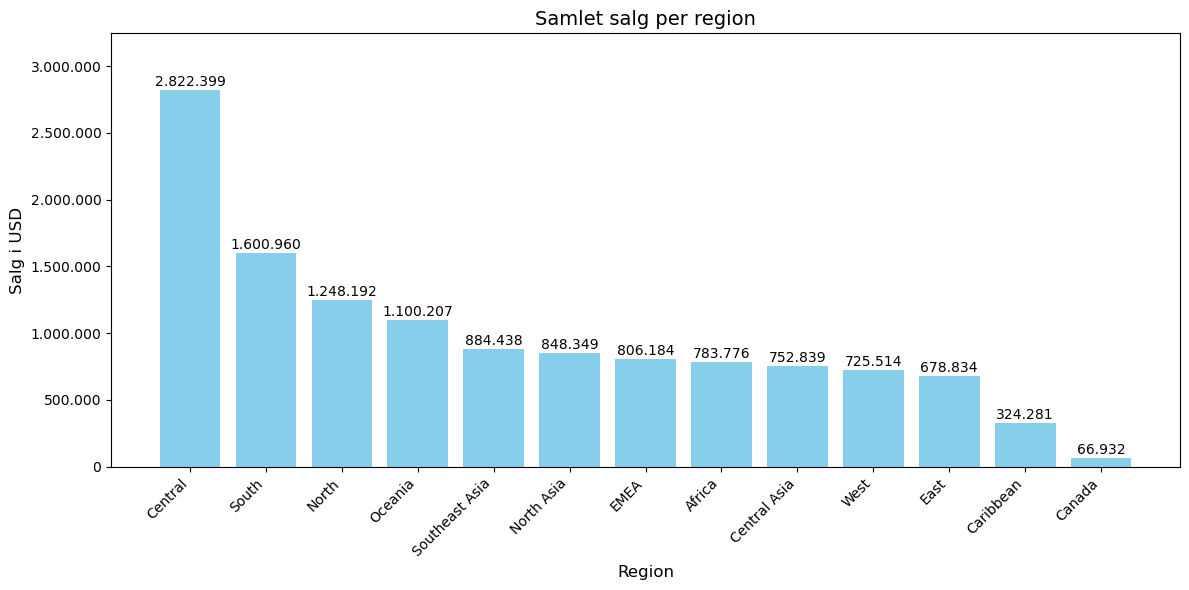

In [104]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Funktion til at formatere med punktum som tusindtalsseparator
def tusindtals_format(x, pos):
    return f'{int(x):,}'.replace(',', '.')

sales_by_region = df.groupby('region')['sales'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(sales_by_region.index, sales_by_region.values, color='skyblue')

# Tilføj værdi over hver søjle
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 30000, 
            f'{height:,.0f}'.replace(',', '.'), ha='center', fontsize=10)

# Anvend brugerdefineret formatter på y-aksen
ax.yaxis.set_major_formatter(FuncFormatter(tusindtals_format))

# Labels og layout
ax.set_title('Samlet salg per region', fontsize=14)
ax.set_ylabel('Salg i USD', fontsize=12)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylim(0, sales_by_region.max() * 1.15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


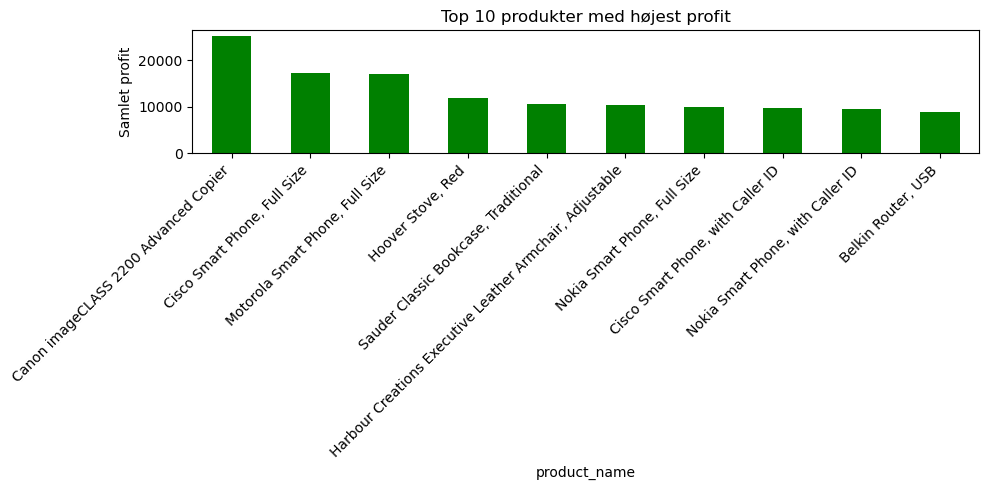

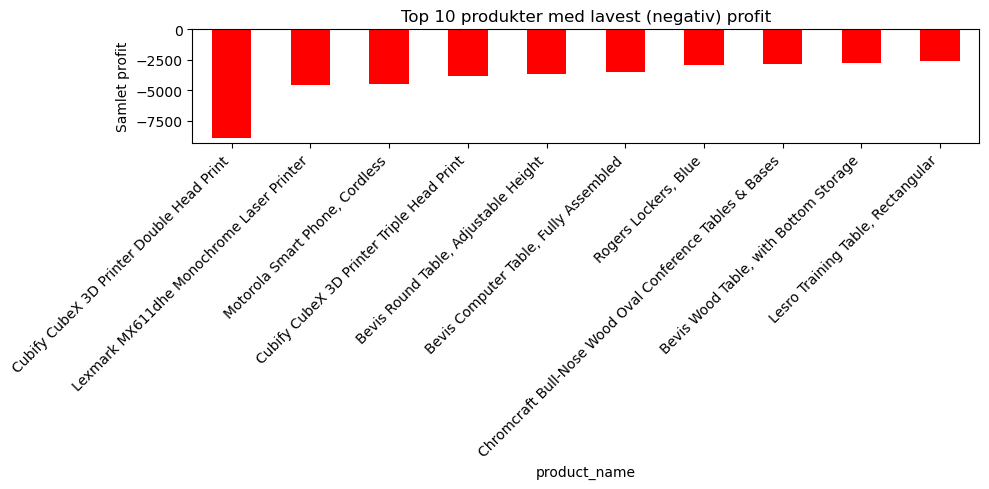

In [106]:
# 1. Hvilke produkter giver høj eller lav profit? (top og bund 10)

top_10_profit = df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)
bottom_10_profit = df.groupby('product_name')['profit'].sum().sort_values(ascending=True).head(10)

# Plot top 10
plt.figure(figsize=(10,5))
top_10_profit.plot(kind='bar', color='green')
plt.title('Top 10 produkter med højest profit')
plt.ylabel('Samlet profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot bund 10
plt.figure(figsize=(10,5))
bottom_10_profit.plot(kind='bar', color='red')
plt.title('Top 10 produkter med lavest (negativ) profit')
plt.ylabel('Samlet profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

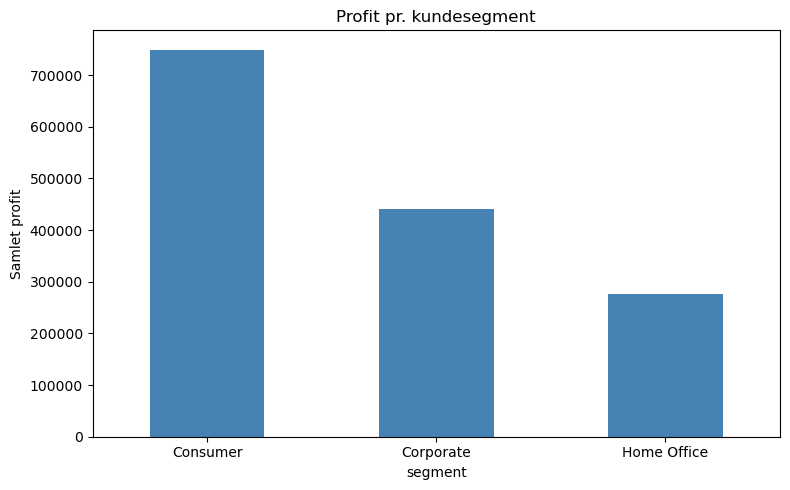

In [108]:
# 2. Hvilke kundesegmenter er mest værdifulde?

segment_profit = df.groupby('segment')['profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
segment_profit.plot(kind='bar', color='steelblue')
plt.title('Profit pr. kundesegment')
plt.ylabel('Samlet profit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

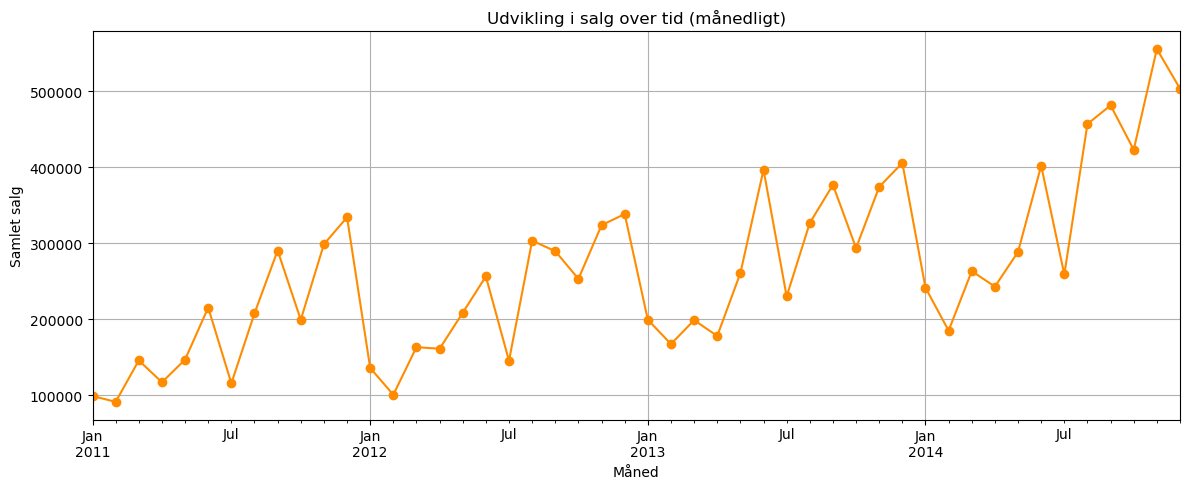

In [110]:
# 3. Hvordan varierer salget over tid eller region?
# Her bruger vi månedlig total salg

df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['sales'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o', color='darkorange')
plt.title('Udvikling i salg over tid (månedligt)')
plt.ylabel('Samlet salg')
plt.xlabel('Måned')
plt.grid(True)
plt.tight_layout()
plt.show()